In [1]:
import pandas as pd 
import numpy as np 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import lightgbm as lgb
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test_QkPvNLx.csv')
calender = pd.read_csv('calender_1.csv')

all_df = train_df.append(test_df)

all_df = all_df.merge(calender, how= 'left', on = 'Day_No')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [2]:
med_feats= pd.read_csv('fib_med_feats.csv')

In [3]:
from scipy.stats import hmean, gmean

In [4]:
med_feats['hmean_median'] = hmean(med_feats[[ 'Sales_median_0_1',
                                 'Sales_median_0_2',
                                 'Sales_median_0_3',
                                 'Sales_median_0_5',
                                 'Sales_median_0_8',
                                 'Sales_median_0_13',
                                 'Sales_median_0_21']].fillna(0.000000000000000001), axis = 1)
med_feats['hmean_mean'] = hmean(med_feats[[
                            'Sales_mean_0_1',
                                 'Sales_mean_0_2',
                                 'Sales_mean_0_3',
                                 'Sales_mean_0_5',
                                 'Sales_mean_0_8',
                                 'Sales_mean_0_13',
                                 'Sales_mean_0_21'
                                ]].fillna(.000000000000000001), axis = 1)
med_feats['gmean_median'] = gmean(med_feats[[ 'Sales_median_0_1',
                                 'Sales_median_0_2',
                                 'Sales_median_0_3',
                                 'Sales_median_0_5',
                                 'Sales_median_0_8',
                                 'Sales_median_0_13',
                                 'Sales_median_0_21']].fillna(0.000000000000000001), axis = 1)
med_feats['gmean_mean'] = gmean(med_feats[[
                            'Sales_mean_0_1',
                                 'Sales_mean_0_2',
                                 'Sales_mean_0_3',
                                 'Sales_mean_0_5',
                                 'Sales_mean_0_8',
                                 'Sales_mean_0_13',
                                 'Sales_mean_0_21'
                                ]].fillna(.000000000000000001), axis = 1)
med_feats['mean_median'] = np.mean(med_feats[[ 'Sales_median_0_1',
                                 'Sales_median_0_2',
                                 'Sales_median_0_3',
                                 'Sales_median_0_5',
                                 'Sales_median_0_8',
                                 'Sales_median_0_13',
                                 'Sales_median_0_21']].fillna(0.000000000000000001), axis = 1)
med_feats['mean_mean'] = np.mean(med_feats[[
                            'Sales_mean_0_1',
                                 'Sales_mean_0_2',
                                 'Sales_mean_0_3',
                                 'Sales_mean_0_5',
                                 'Sales_mean_0_8',
                                 'Sales_mean_0_13',
                                 'Sales_mean_0_21'
                                ]].fillna(.000000000000000001), axis = 1)

med_feats['median_of_median'] = np.median(med_feats[[ 'Sales_median_0_1',
                                 'Sales_median_0_2',
                                 'Sales_median_0_3',
                                 'Sales_median_0_5',
                                 'Sales_median_0_8',
                                 'Sales_median_0_13',
                                 'Sales_median_0_21']].fillna(0.000000000000000001), axis = 1)

In [16]:
med_feats

,Sales_median_60_lag,Sales_mean_60_lag,Sales_mean_0_1,Sales_median_0_1,Sales_mean_0_2,Sales_median_0_2,Sales_mean_0_3,Sales_median_0_3,Sales_mean_0_5,Sales_median_0_5,...,Sales_mean_0_21,Sales_median_0_21,ID,hmean_median,hmean_mean,gmean_median,gmean_mean,mean_median,mean_mean,median_of_median
0,81.0,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18
1,80.0,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18
2,79.0,78.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18
3,79.5,78.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18
4,79.0,71.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18,1.000000e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548082,107.0,109.045558,127.000000,121.0,129.000000,135.0,124.571429,125.0,131.000000,132.0,...,123.353741,126.0,548083,1.280678e+02,1.266845e+02,1.281411e+02,1.267084e+02,1.282143e+02,1.267324e+02,1.285000e+02
548083,107.0,109.086462,126.000000,121.0,129.571429,135.0,125.523810,132.0,132.428571,133.0,...,123.414966,126.0,548084,1.292053e+02,1.269824e+02,1.292818e+02,1.270133e+02,1.293571e+02,1.270444e+02,1.300000e+02
548084,107.0,109.152273,129.285714,121.0,131.000000,135.0,126.190476,132.0,133.285714,133.0,...,123.761905,126.0,548085,1.292053e+02,1.278657e+02,1.292818e+02,1.279051e+02,1.293571e+02,1.279447e+02,1.300000e+02
548085,107.0,109.149830,125.571429,114.0,132.357143,135.0,125.476190,132.0,133.914286,133.0,...,123.972789,126.0,548086,1.277915e+02,1.273920e+02,1.279710e+02,1.274467e+02,1.281429e+02,1.275021e+02,1.300000e+02


In [6]:
all_df = all_df.merge(med_feats[['ID', 'hmean_median', 'hmean_mean', 'gmean_median',
       'gmean_mean', 'mean_median', 'mean_mean', 'median_of_median']], on = 'ID', how = 'left')

In [7]:
all_df['Sales'] = np.log1p(all_df['Sales'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
ut = pd.read_csv('user_traffic_pred.csv')

In [9]:
ut.columns

Index(['ID', 'Course_ID', 'User_Traffic', 'User_Traffic_rolled_predicted'], dtype='object')

In [10]:
all_df = all_df.merge(ut[['ID', 'User_Traffic_rolled_predicted']], on = 'ID', how = 'left')

In [11]:
folds = [[(1,517),(518, 577)],
 [(1,577),(578, 638)],
 [(1,638), (639, 699)],
 [(1, 699), (700, 761)],
 [(1, 761), (762, 820)],
 [(1,820), (821, 882)]]

reject_cols = ['ID', 'Day_No', 'date' , 'Sales', 'User_Traffic']
catCols = ['Course_ID', 'Course_Type', 'Course_Domain']
trainCols = [x for x in all_df.columns if x not in reject_cols]
target = 'Sales'

In [12]:
for c in catCols:
    all_df[c] = all_df[c].astype('category')

In [13]:
def fold_gen(all_df):
    for f in folds:
        tr_f_l, tr_f_u = f[0][0], f[0][1]
        va_f_l, va_f_u = f[1][0], f[1][1]
        trPart = all_df[(all_df.Day_No <= tr_f_u) & (all_df.Day_No >= tr_f_l)]
        vaPart = all_df[(all_df.Day_No <= va_f_u) & (all_df.Day_No >= va_f_l)]
        yield trPart, vaPart

In [22]:
train_res = []
valid_res = []

for i, (train, valid) in enumerate(fold_gen(all_df)):
    print(f"Training for fold {i}")
    dtrain = lgb.Dataset(train[trainCols], train[target], free_raw_data=False, silent=True)
    dvalid = lgb.Dataset(valid[trainCols], valid[target], free_raw_data=False, silent = True)
    lgb_params = {
                'objective': 'regression',
                'boosting_type': 'gbdt',
                'learning_rate': .1,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'num_leaves': 31,
                'max_depth': -1,
                'seed': 13,
                'n_jobs': 8,
                'min_split_gain': .00001,
                'reg_alpha': .00001,
                'reg_lambda': .00001,
                'metric': 'rmse'
                }

    # Fit the model
    hist = lgb.train(
                params=lgb_params, 
                train_set=dtrain,
                valid_sets= [dtrain, dvalid],
                num_boost_round=3000,
                categorical_feature=catCols,
                early_stopping_rounds=100,
                verbose_eval=100)
    
    
    train_res.append(hist.best_score['training']['rmse'])
    valid_res.append(hist.best_score['valid_1']['rmse'])

Training for fold 0


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Course_Domain', 'Course_ID', 'Course_Type']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 0.140844	valid_1's rmse: 0.150664
[200]	training's rmse: 0.122907	valid_1's rmse: 0.143789
[300]	training's rmse: 0.113855	valid_1's rmse: 0.141249
[400]	training's rmse: 0.107934	valid_1's rmse: 0.139415
[500]	training's rmse: 0.103268	valid_1's rmse: 0.138198
[600]	training's rmse: 0.0994976	valid_1's rmse: 0.137736
[700]	training's rmse: 0.0966857	valid_1's rmse: 0.13754
Early stopping, best iteration is:
[680]	training's rmse: 0.0971602	valid_1's rmse: 0.137268
Training for fold 1
Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 0.138741	valid_1's rmse: 0.137714
[200]	training's rmse: 0.120731	valid_1's rmse: 0.132422
[300]	training's rmse: 0.112394	valid_1's rmse: 0.132905
Early stopping, best iteration is:
[230]	training's rmse: 0.117553	valid_1's rmse: 0.132008
Training for fold 2
Training until validation scores don't improve for 100 rounds
[100]	training's r

In [23]:
np.mean(train_res), np.std(train_res)

(0.10531301843891668, 0.010107577641104)

In [24]:
np.mean(valid_res), np.std(valid_res)

(0.1831274282261277, 0.09237593381215047)

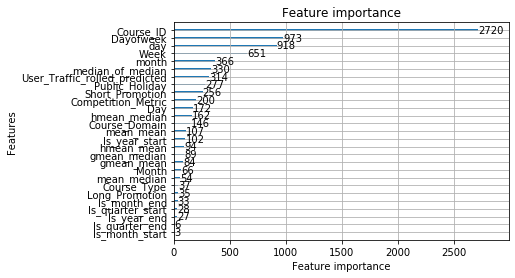

In [26]:
lgb.plot_importance(hist)

In [14]:
oot = all_df[all_df['Sales'].isnull()]
train = all_df[~all_df['Sales'].isnull()]
train = train[~train.Month.isin([12,1,4])]

In [15]:
dtrain = lgb.Dataset(train[trainCols], train[target], free_raw_data=False, silent=True)
lgb_params = {
            'objective': 'regression',
            'boosting_type': 'gbdt',
            'learning_rate': .1,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'num_leaves': 31,
            'max_depth': -1,
            'seed': 13,
            'n_jobs': 8,
            'min_split_gain': .00001,
            'reg_alpha': .00001,
            'reg_lambda': .00001,
            'metric': 'rmse'
            }
# Fit the model
oot_model = lgb.train(
            params=lgb_params, 
            train_set=dtrain,
            valid_sets= [dtrain],
            num_boost_round=3000,
            categorical_feature=catCols,
            early_stopping_rounds=100,
            verbose_eval=100)

pred = oot_model.predict(oot[trainCols])
oot['Sales'] = pred
oot['Sales'] = np.expm1(oot['Sales'])
oot[['ID', 'Sales']].to_csv('subm_base.csv', index = False)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Course_Domain', 'Course_ID', 'Course_Type']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 0.12743
[200]	training's rmse: 0.114359
[300]	training's rmse: 0.108087
[400]	training's rmse: 0.102417
[500]	training's rmse: 0.0986775
[600]	training's rmse: 0.0962775
[700]	training's rmse: 0.0941399
[800]	training's rmse: 0.0924225
[900]	training's rmse: 0.0911499
[1000]	training's rmse: 0.0898794
[1100]	training's rmse: 0.0888277
[1200]	training's rmse: 0.0878446
[1300]	training's rmse: 0.086771
[1400]	training's rmse: 0.0855014
[1500]	training's rmse: 0.0845255
[1600]	training's rmse: 0.0836066
[1700]	training's rmse: 0.0829254
[1800]	training's rmse: 0.0822775
[1900]	training's rmse: 0.0816465
[2000]	training's rmse: 0.0808891
[2100]	training's rmse: 0.0803294
[2200]	training's rmse: 0.0797343
[2300]	training's rmse: 0.0790406
[2400]	training's rmse: 0.0784221
[2500]	training's rmse: 0.0778458
[2600]	training's rmse: 0.0773696
[2700]	training's rmse: 0.0769044
[2800]	training's rmse: 0.0764286
[

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
all_df['User_Traffic'] = all_df.groupby('Course_ID')['User_Traffic'].transform(lambda x : x.rolling(7).mean())
all_df['User_Traffic'] = np.log1p(all_df['User_Traffic'])
pred_user_traffic = pd.Series(index = all_df.index, data = None)

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [10]:
train_period = (0,60)
pred_period = (61,120)

## Some manual intervention required to make for OOT. 

while(True):
    if pred_period[0] >= 942: continue
    day_train_start = train_period[0]
    day_train_end = train_period[1]
    day_valid_start = pred_period[0]
    day_valid_end = pred_period[1]
    
    tr = all_df.query(f"(Day_No <= {day_train_end}) & (Day_No >= {day_train_start})")
    pred = all_df.query(f"(Day_No <= {day_valid_end}) & (Day_No >= {day_valid_start})")
    
    dtrain = lgb.Dataset(tr[trainCols], tr['User_Traffic'], free_raw_data=False, silent=True)
    dvalid = lgb.Dataset(pred[trainCols], pred['User_Traffic'], free_raw_data=False, silent=True)
    
    lgb_params = {
                'objective': 'regression',
                'boosting_type': 'gbdt',
                'learning_rate': .1,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'num_leaves': 31,
                'max_depth': -1,
                'seed': 13,
                'n_jobs': 8,
                'min_split_gain': .00001,
                'reg_alpha': .00001,
                'reg_lambda': .00001,
                'metric': 'rmse'
                }

    # Fit the model
    hist = lgb.train(
                params=lgb_params, 
                train_set=dtrain,
                valid_sets= [dtrain],
                num_boost_round=3000,
                categorical_feature=catCols,
                early_stopping_rounds=100,
                verbose_eval=0)
    
    prediction = hist.predict(pred[trainCols])
    
    try:
        print(f"RMSE : {mean_squared_error(pred['User_Traffic'], prediction)}")
    except:
        print(f"Done Till {pred_period[1]}")
        print("Entered OOT Phase")
        pred_user_traffic.iloc[pred.index] = prediction
        break
    
    pred_user_traffic.iloc[pred.index] = prediction
    
    print(f"Done Till {pred_period[1]}")
    train_period = (0, train_period[1] + 60)
    pred_period = (train_period[1] + 1, train_period[1] + 60)

categorical_feature in Dataset is overridden.
New categorical_feature is ['Course_Domain', 'Course_ID', 'Course_Type']


Done Till 942
Entered OOT Phase


In [11]:
pred_user_traffic

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
548082    8.957769
548083    8.964530
548084    9.057988
548085    9.111396
548086    9.098207
Length: 548087, dtype: float64

In [12]:
temp = all_df[['ID', 'Course_ID','User_Traffic']]

In [13]:
temp['User_Traffic_rolled_predicted'] = pred_user_traffic


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
temp_cid = temp.query('Course_ID == 544')

In [15]:
temp.to_csv('user_traffic_pred.csv', index = False)